In [1]:
import pandas as pd
import numpy as np
import phate
import scprep
import scanpy as sc

In [2]:
EBT_counts = sc.read_h5ad('EBT_counts_sqrt.h5ad')
cell_type = EBT_counts.obs['cell_type']

In [3]:
EBT_counts.uns["iroot"] = 1257

In [4]:
sc.pp.pca(EBT_counts,100)
sc.pp.neighbors(EBT_counts, 100,) # use_rep='X_pca'
sc.tl.diffmap(EBT_counts, 20)
sc.tl.dpt(EBT_counts, n_dcs=20,  copy=False)

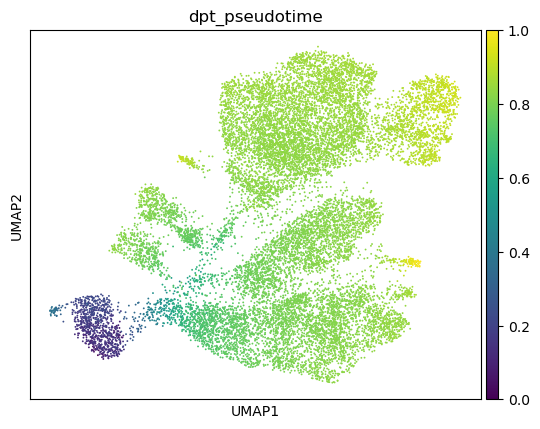

In [5]:
sc.tl.umap(EBT_counts)
sc.pl.umap(EBT_counts, color=['dpt_pseudotime'])

In [6]:
EBT_counts.obs['dpt_pseudotime'].to_csv('eb.dpt_pseudotime.csv')

In [7]:
sc.tl.umap(EBT_counts)

In [8]:
sc.external.tl.palantir(EBT_counts,use_adjacency_matrix=False,n_components=20,knn=100)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


Determing nearest neighbor graph...


In [9]:
pal_res = sc.external.tl.palantir_results(EBT_counts,early_cell=EBT_counts.obs_names[1257],num_waypoints = 2000)

Sampling and flocking waypoints...
Time for determining waypoints: 0.08430004517237345 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.7036155502001444 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9994
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [10]:
pal_res.pseudotime.to_csv('eb.palantir_pseudotime.csv')

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline

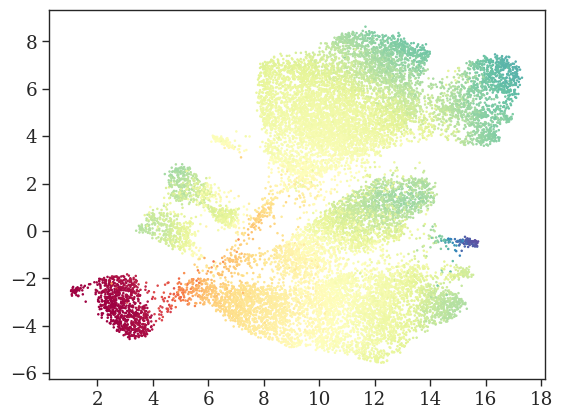

In [12]:
umap = EBT_counts.obsm['X_umap']
plt.scatter(umap[:,0], umap[:,1], c=pal_res.pseudotime.values,s=1,cmap='Spectral')
plt.show()